<a href="https://colab.research.google.com/github/Robin-Zuniga/Example_Project_01/blob/main/Example_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [22]:
# Load the data
file_path = '/content/layoffs_c4_cleaned_data.csv'
layoffs_data = pd.read_csv(file_path)

**Total Layoffs Over Time**

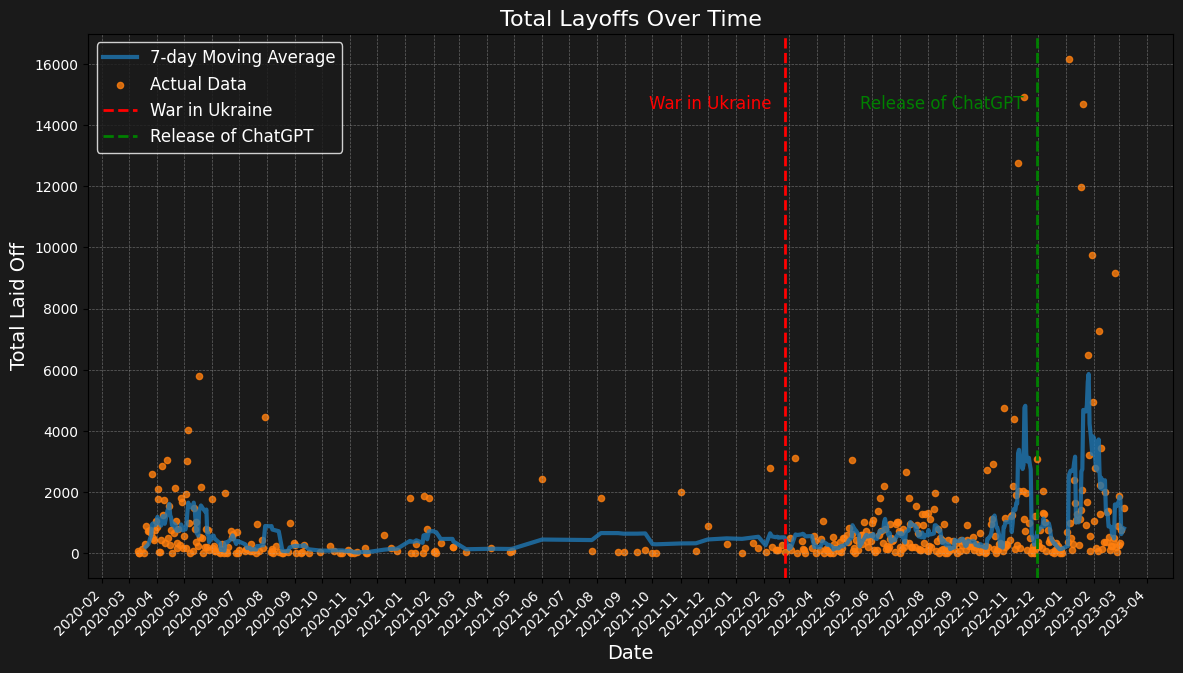

In [23]:
# Convert the 'date' column to datetime format
layoffs_data['date'] = pd.to_datetime(layoffs_data['date'])

# Group the data by date and sum the total_laid_off
layoffs_trends = layoffs_data.groupby('date')['total_laid_off'].sum().reset_index()

# Plotting the graph with enhancements and dark background
plt.figure(figsize=(14, 8), facecolor='#1A1A1A')

# Adding a smoothed line plot
layoffs_trends.set_index('date')['total_laid_off'].rolling(window=7).mean().plot(
    style='-', lw=3, color='#1f77b4', label='7-day Moving Average', alpha=0.8)

# Adding scatter plot for actual data points
plt.scatter(layoffs_trends['date'], layoffs_trends['total_laid_off'], color='#ff7f0e', alpha=0.8, label='Actual Data', s=20)

# Adding vertical lines for significant events
plt.axvline(pd.to_datetime('2022-02-24'), color='red', linestyle='--', lw=2, label='War in Ukraine')
plt.axvline(pd.to_datetime('2022-11-30'), color='green', linestyle='--', lw=2, label='Release of ChatGPT')

# Adding titles and labels
plt.title('Total Layoffs Over Time', fontsize=16, color='white')
plt.xlabel('Date', fontsize=14, color='white')
plt.ylabel('Total Laid Off', fontsize=14, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Formatting x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Adding legend
legend = plt.legend(facecolor='#1A1A1A', edgecolor='white', fontsize=12)
for text in legend.get_texts():
    text.set_color('white')

# Annotating the events with increased distance
plt.text(pd.to_datetime('2022-02-24') - pd.Timedelta(days=15), max(layoffs_trends['total_laid_off']) * 0.9,
         'War in Ukraine', color='red', fontsize=12, ha='right')
plt.text(pd.to_datetime('2022-11-30') - pd.Timedelta(days=15), max(layoffs_trends['total_laid_off']) * 0.9,
         'Release of ChatGPT', color='green', fontsize=12, ha='right')

# Set plot background color
plt.gca().set_facecolor('#1A1A1A')

# Save the plot with a dark background
plt.savefig('/content/total_layoffs_over_time.png', facecolor='#1A1A1A')

# Show plot
plt.show()

**Total Layoffs by Month**

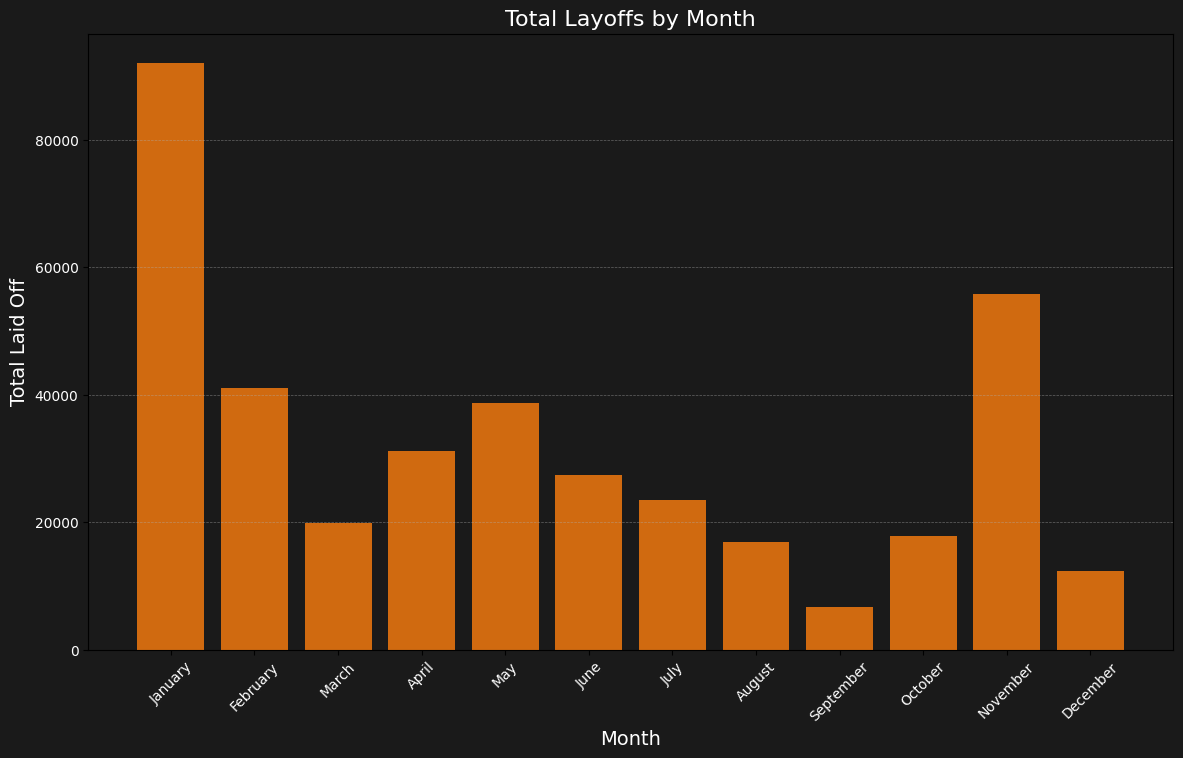

In [24]:
# Convert the 'date' column to datetime format
layoffs_data['date'] = pd.to_datetime(layoffs_data['date'])

# Extract month from the date column
layoffs_data['month'] = layoffs_data['date'].dt.month

# Group by month to find the total layoffs per month
monthly_layoffs = layoffs_data.groupby('month')['total_laid_off'].sum().reset_index()

# Month names for x-axis
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the total layoffs per month with enhancements and dark background
plt.figure(figsize=(14, 8), facecolor='#1A1A1A')

# Creating the bar plot with orange color
plt.bar(monthly_layoffs['month'], monthly_layoffs['total_laid_off'], color='#ff7f0e', alpha=0.8)

# Adding titles and labels
plt.title('Total Layoffs by Month', fontsize=16, color='white')
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('Total Laid Off', fontsize=14, color='white')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

# Formatting x-axis for better readability
plt.xticks(monthly_layoffs['month'], months, rotation=45, color='white')
plt.yticks(color='white')

# Set plot background color
plt.gca().set_facecolor('#1A1A1A')

# Save the plot with a dark background
plt.savefig('/content/monthly_layoffs.png', facecolor='#1A1A1A')

# Show plot
plt.show()

**Industry Layoffs**

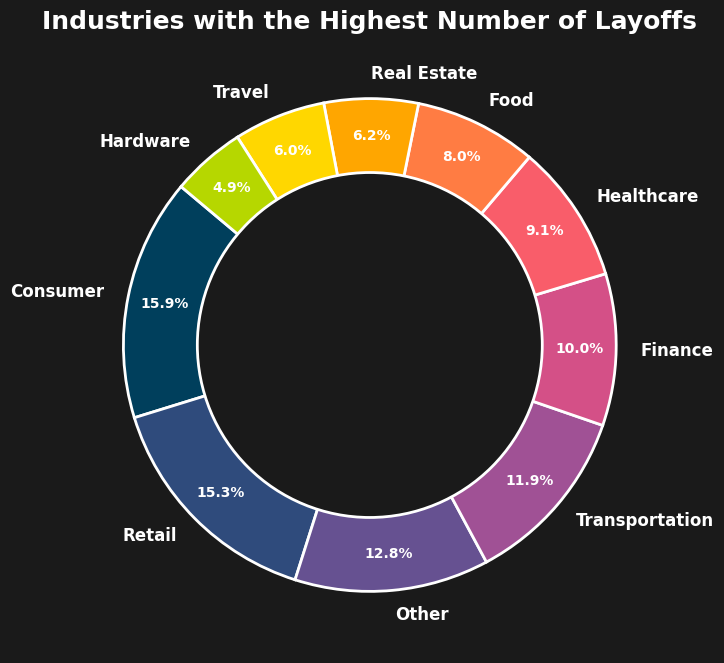

In [25]:
# Group by industry to find the total layoffs per industry
industry_layoffs = layoffs_data.groupby('industry')['total_laid_off'].sum().reset_index()

# Get the top industries by layoffs
top_industries = industry_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)

# Define a set of minimalistic, matte blue tones
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600', '#ffd700', '#b6d700']

# Plotting the pie chart for industries with the highest number of layoffs
plt.figure(figsize=(14, 8), facecolor='#1A1A1A')

# Creating the pie chart with the chosen color scheme and custom design choices
wedges, texts, autotexts = plt.pie(
    top_industries['total_laid_off'],
    labels=top_industries['industry'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Customizing the text for a clean and futuristic look
for text in texts:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')  # Make the numbers bold

# Adding a title
plt.title('Industries with the Highest Number of Layoffs', fontsize=18, color='white', fontweight='bold')

# Adding a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='#1A1A1A', edgecolor='white', linewidth=2)
plt.gca().add_artist(centre_circle)

# Ensuring the pie chart is drawn as a circle
plt.gca().set_aspect('equal')

# Set plot background color
plt.gca().set_facecolor('#1A1A1A')

# Save the plot with a dark background
plt.savefig('/content/industry_layoffs_pie_chart.png', facecolor='#1A1A1A')

# Show plot
plt.show()